In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Load artifacts

In [2]:
artifacts = joblib.load("../models/housing_model.pkl")
model = artifacts['model']
scaler = artifacts['scaler']
features = artifacts['features']

/home/lokraj/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/lokraj/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Load test data

In [4]:
X_test = pd.read_csv("../data/processed/X_test.csv")[features]
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

# Preprocess and predict

In [5]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

/home/lokraj/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Performance Metrics

In [6]:
metrics = {
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2": r2_score(y_test, y_pred)
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

MSE: 27.1661
RMSE: 5.2121
R2: 0.6296


## Residuals Analysis

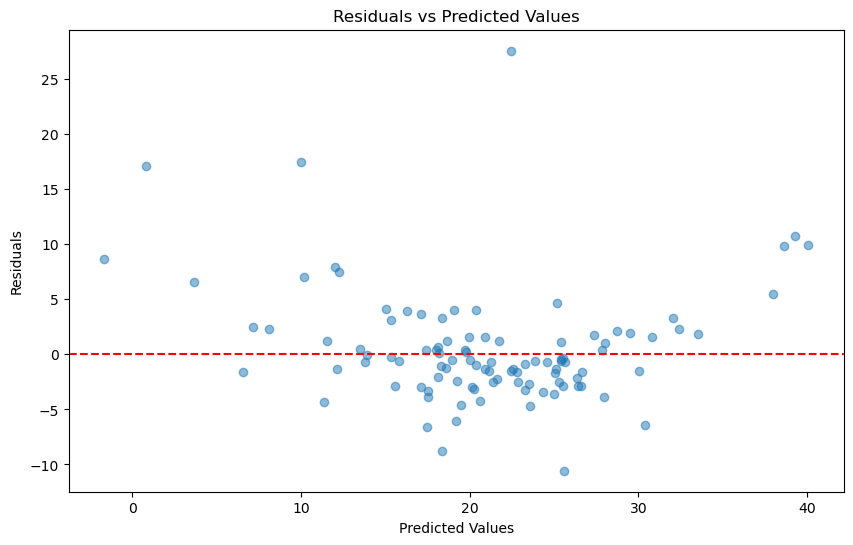

In [7]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

## Feature Importance (Coefficients)

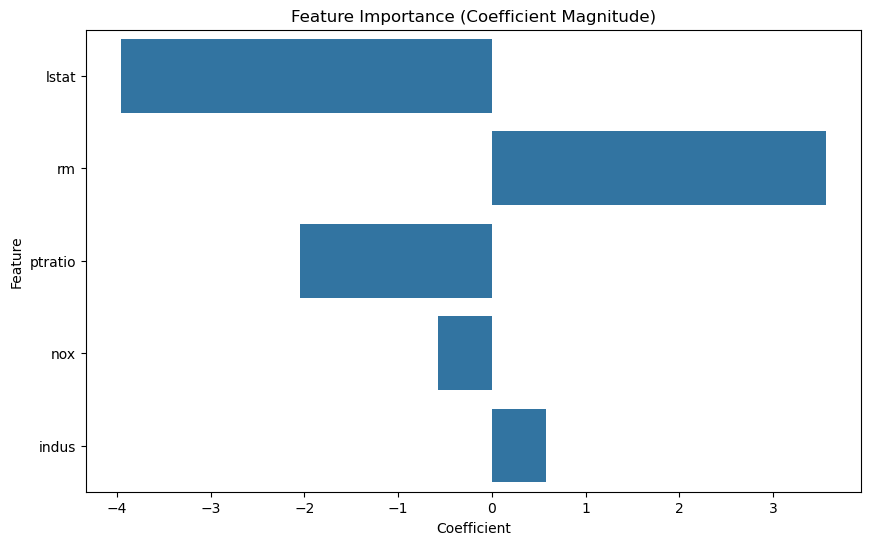

In [9]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Importance (Coefficient Magnitude)")
plt.show()